## Module 4

This week we will be looking at Enterococcus levels in the Hudson River, using data from the
organization Riverkeeper ( http://www.riverkeeper.org/).

Background: Enterococcus is a fecal indicating bacteria that lives in the intestines of humans
and other warm-blooded animals. Enterococcus (“ Entero”) counts are useful as a water
quality indicator due to their abundance in human sewage, correlation with many human
pathogens and low abundance in sewage free environments. The United States
Environmental Protection Agency (EPA) reports Entero counts as colonies (or cells) per 100
ml of water.

Riverkeeper has based its assessment of acceptable water quality on the 2012 Federal
Recreational Water Quality Criteria from the US EPA. Unacceptable water is based on an
illness rate of 32 per 1000 swimmers.

The federal standard for unacceptable water quality is a single sample value of greater than
110 Enterococcus/100 mL, or five or more samples with a geometric mean (a weighted
average) greater than 30 Enterococcus/100 mL.

Data: I have provided the data on our github page, in the folder
https://github.com/charleyferrari/CUNY_DATA608/tree/master/lecture4/Data. I have not
cleaned it – you need to do so.

This assignment must be done in python. It must be done using the ‘bokeh’, 'seaborn', or
'pandas' package. You may turn in either a . py file or an ipython notebook file.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [9]:
from ipywidgets import interact

In [239]:
hudson = pd.read_csv("https://raw.githubusercontent.com/charleyferrari/CUNY_DATA608/master/lecture4/Data/riverkeeper_data_2013.csv")

In [240]:
hudson.head(3)

,Site,Date,EnteroCount,FourDayRainTotal,SampleCount
0,Hudson above Mohawk River,10/16/2011,1733,1.5,35
1,Hudson above Mohawk River,10/21/2013,4,0.2,35
2,Hudson above Mohawk River,9/21/2013,20,0.0,35


In [241]:
hudson.describe(include = 'all')

,Site,Date,EnteroCount,FourDayRainTotal,SampleCount
count,3397,3397,3397,3397.000000,3397.000000
unique,75,424,425,NaN,NaN
top,Piermont Pier,5/19/2011,<10,NaN,NaN
freq,187,27,528,NaN,NaN
mean,NaN,NaN,NaN,0.568001,56.886370
std,NaN,NaN,NaN,1.000387,41.588476
min,NaN,NaN,NaN,0.000000,27.000000
25%,NaN,NaN,NaN,0.000000,37.000000
50%,NaN,NaN,NaN,0.200000,42.000000
75%,NaN,NaN,NaN,0.700000,50.000000


In [242]:
hudson = hudson.dropna(axis=0)

In [243]:
hudson.columns

Index(['Site', 'Date', 'EnteroCount', 'FourDayRainTotal', 'SampleCount'], dtype='object')

In [244]:
hudson['Date'] = pd.to_datetime(hudson['Date'])

In [245]:
hudson['EnteroCount'].unique()

array(['1733', '4', '20', '6', '31', '238', '23', '11', '15', '10', '30',
       '231', '91', '>2420', '25', '12', '<1', '28', '276', '41', '479',
       '27', '50', '130', '830', '64', '1300', '461', '770', '21', '1023',
       '2420', '68', '142', '33', '96', '128', '26', '117', '42', '32',
       '416', '1986', '48', '8', '22', '727', '45', '17', '54', '272',
       '260', '99', '199', '387', '579', '67', '345', '63', '108', '34',
       '72', '1553', '49', '65', '980', '1203', '40', '24', '56', '61',
       '7', '18', '1414', '36', '435', '219', '81', '525', '84', '602',
       '190', '46', '35', '47', '38', '411', '139', '143', '201', '3',
       '88', '161', '39', '82', '921', '687', '59', '53', '75', '51',
       '134', '29', '19', '211', '179', '187', '76', '488', '135', '43',
       '16', '1046', '146', '13', '93', '866', '104', '122', '137', '613',
       '163', '2', '100', '85', '1120', '57', '1', '5', '14', '9', '52',
       '291', '126', '649', '328', '69', '194', '261', '

In [246]:
import string 
hudson['stange']=hudson['EnteroCount'].str.contains('[{}]'.format(string.punctuation)).astype(int)

In [247]:
stange=hudson.loc[hudson['stange']==1,]
stange['EnteroCount'].unique()

array(['>2420', '<1', '<10', '>24196'], dtype=object)

In [248]:
hudson['EnteroCount']=hudson['EnteroCount'].str.replace('[{}]'.format(string.punctuation), '')

In [249]:
hudson['EnteroCount']=pd.to_numeric(hudson['EnteroCount'])

### Create lists & graphs of the best and worst places to swim in the dataset.

In [250]:
from scipy.stats.mstats import gmean

In [251]:
hudson['geomean']=hudson.groupby('Site').EnteroCount.apply(gmean,axis=0)
hudson['geomean'].unique()

array([ nan])

Geometric mean returned null so there must be 0 or null in the dataset.
Then I will check if there is missing data or o in EnteroCount

In [252]:
hudson['EnteroCount'].isnull().values.any()

False

In [253]:
any(n == 0 for n in hudson['EnteroCount'])

True

In [254]:
hudson.loc[hudson['EnteroCount']==0,'EnteroCount']

522    0
Name: EnteroCount, dtype: int64

There is only one 0 record. So I remove row 522 in order to calculate geometric mean for EnteroCount. 


In [255]:
hudson.drop(hudson.index[[522]],inplace=True)

In [258]:
any(n == 0 for n in hudson['EnteroCount'])

False

In [259]:
hudson['EnteroCount'].isnull().values.any()

False

In [274]:
hudson.groupby(['Site']).agg(lambda x: gmean(list(x)))

AttributeError: 'DataFrameGroupBy' object has no attribute 'gmean'

In [303]:
a=hudson.groupby(['Site'])['EnteroCount'].apply(gmean,axis=0)
a.to_dict() 
hudson['geomean'] = hudson['Site'].map(a)

In [305]:
hudson['swim'] = np.where(((hudson['EnteroCount']>=110) |(hudson['geomean']>=30)), 'unacceptable', 'acceptable')

In [306]:
hudson['Site'].unique()

array(['Hudson above Mohawk River', 'Mohawk River at Waterford',
       'Hudson River above Troy Lock', 'Congress St. Bridge- Troy',
       'Albany Rowing Dock', 'Dunn Memorial Bridge- Albany',
       'Island Creek/Normans Kill', 'Bethlehem Launch Ramp', 'Castleton',
       'Coeymans Landing', 'Coxsackie Waterfront Park',
       "Gay's Point mid-channel", 'Athens', 'Hudson Landing Ramp',
       'Catskill Creek- First Bridge', 'Catskill Launch Ramp',
       'Catskill Creek- East End', 'Inbocht Bay', 'Malden Launch Ramp',
       'Esopus Creek West', 'Esopus Creek Entrance', 'Tivoli Landing',
       'Ulster Landing Beach', 'Kingston Point Beach',
       'Kingston STP Outfall', 'Rondout- Kingston Public Dock',
       'Rondout- Eddyville Anchorage', 'Port Ewen Drinking Water Intake',
       'Norrie Point Yacht Basin', 'Norrie Point mid-channel',
       'Poughkeepsie Drinking Water Intake', 'Poughkeepsie Launch Ramp',
       'Marlboro Landing', 'Wappingers Creek', 'Beacon Harbor',
       'Ne

In [307]:
ts = hudson['EnteroCount']
ts

0        1733
1           4
2          20
3           6
4          31
5         238
6          23
7          11
8          15
9           6
10         10
11         11
12         30
13         11
14        231
15         11
16         11
17         91
18       2420
19         15
20         25
21         31
22         12
23          1
24          4
25         28
26        276
27       2420
28          6
29          1
        ...  
3367    24196
3368      259
3369       10
3370       10
3371      241
3372       10
3373    24196
3374       96
3375       41
3376     2603
3377     1046
3378       10
3379    24196
3380    24196
3381       10
3382     4884
3383       63
3384      274
3385       30
3386       10
3387      160
3388    17329
3389       20
3390     5790
3391    24196
3392       10
3393       35
3394      238
3395        6
3396      882
Name: EnteroCount, Length: 3396, dtype: int64

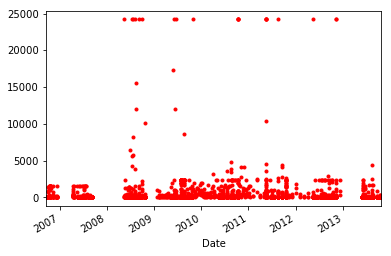

In [308]:
ts = hudson['EnteroCount']
ts.index= hudson['Date']

ts.plot(kind='line', style=[' .r'])

In [163]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
location = geolocator.geocode("Hudson above Mohawk River")
print(location.address)

ModuleNotFoundError: No module named 'geopy'

In [30]:
dslice = hp.loc[(hp['Metro'] == 'Atlanta') & (hp['Seasonality'] == 'SA'), ['DATE', 'Tier', 'HPI']]

In [34]:
dslice.head(3)

,DATE,Tier,HPI
275,1993-01-01,High,72.88
276,1993-02-01,High,72.81
277,1993-03-01,High,72.96


In [35]:
dslice = dslice.pivot(index = 'DATE', columns = 'Tier', values = 'HPI')
dslice.head(3)

Tier,High,Low,Middle
DATE,,,
1993-01-01,72.88,66.82,71.60
1993-02-01,72.81,66.80,71.70
1993-03-01,72.96,67.03,72.06


In [36]:
type(dslice)

pandas.core.frame.DataFrame

In [37]:
dslice = dslice.reset_index()

In [38]:
dslice.head(3)

Tier,DATE,High,Low,Middle
0,1993-01-01,72.88,66.82,71.60
1,1993-02-01,72.81,66.80,71.70
2,1993-03-01,72.96,67.03,72.06


In [39]:
def plotthis(metro, sansa):
    dslice = hp.ix[(hp['Metro'] == metro) & (hp['Seasonality'] == sansa), ['DATE', 'Tier', 'HPI']]
    dslice = dslice.pivot(index = 'DATE', columns = 'Tier', values = 'HPI')
    dslice = dslice.reset_index()
    dslice.plot()

<function __main__.plotthis>

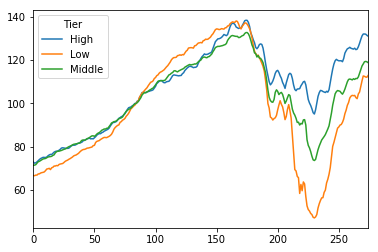

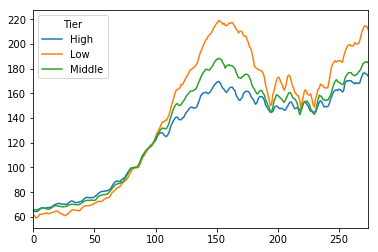

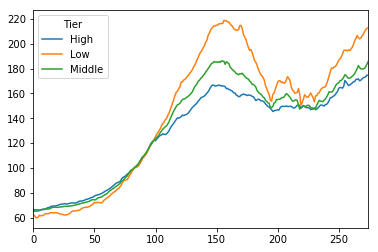

In [40]:
widgets.interact(plotthis, metro=list(hp['Metro'].unique()), sansa=list(hp['Seasonality'].unique()))